In [83]:
import pandas as pd
import numpy as np

In [110]:
url="http://users.stat.ufl.edu/~winner/data/airq402.dat"
ds=pd.read_csv(url,sep='\s+',  names = ["City1", "City2", "Average Fare", "Distance","Average weekly passengers",
                                        "market leading airline","market share leading airline","Average fare","Low price airline",
                                        "market share for low price airline","price"])
ds.dtypes

City1                                  object
City2                                  object
Average Fare                          float64
Distance                                int64
Average weekly passengers             float64
market leading airline                 object
market share leading airline          float64
Average fare                          float64
Low price airline                      object
market share for low price airline    float64
price                                 float64
dtype: object

In [111]:
def remove_outlier(df_input, column_name):
    q1 = df_input[column_name].quantile(0.25)
    q3 = df_input[column_name].quantile(0.75)
    iqr = q3-q1
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_input.loc[(df_input[column_name] > fence_low) & (df_input[column_name] < fence_high)]
    return df_out
ds = remove_outlier(ds,"Average Fare")
ds = remove_outlier(ds,"Distance")
ds = remove_outlier(ds,"Average weekly passengers")
ds = remove_outlier(ds,"market share leading airline")
ds = remove_outlier(ds,"Average fare")
ds = remove_outlier(ds,"market share for low price airline")
ds = remove_outlier(ds,"price")


In [112]:
x = ds[["Distance","Average weekly passengers","market share leading airline","Average fare",
         "market share for low price airline","price"]]
y= ds[["Average fare"]]

In [113]:
ds.corr() < 0.1
ds.drop(['Average weekly passengers', 'market share leading airline','market share for low price airline'], axis=1,inplace= True)
ds.head(2)

,City1,City2,Average Fare,Distance,market leading airline,Average fare,Low price airline,price
0,CAK,ATL,114.47,528,FL,111.03,FL,111.03
1,CAK,MCO,122.47,860,FL,123.09,DL,118.94


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


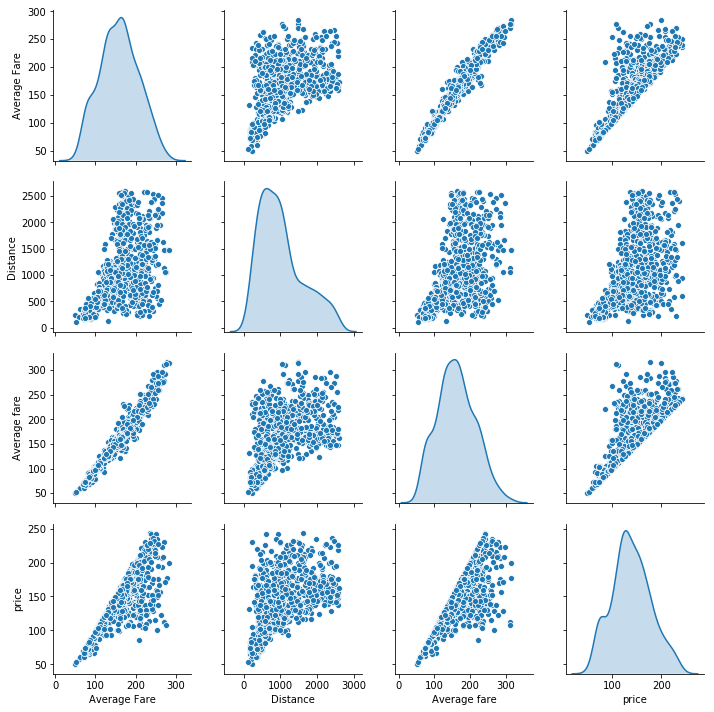

In [114]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.pairplot( ds , diag_kind='kde')


In [115]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split as tts

In [121]:
x = ds[["Distance","Average fare","price"]]
y= ds[["Average fare"]]

In [122]:
x_train,x_test,y_train,y_test= tts(x,y,test_size=0.3,random_state=7)

In [123]:
linreg = LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [124]:
linreg.intercept_

array([-1.13686838e-13])

In [125]:
linreg.coef_

array([[-2.29369738e-17,  1.00000000e+00,  2.05638634e-16]])